In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LassoCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

print ("Model Import Complete")

Model Import Complete


In [18]:
# Load dataset
url = "https://www.dropbox.com/scl/fi/zhzjr8qbh7f9orydgv1dw/chimera_data.csv?rlkey=apfdvomfm7guxmckfs4p0pzzj&dl=1"
chimera_data = pd.read_csv(url)

print(chimera_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18132 entries, 0 to 18131
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   admin_support          18132 non-null  int64  
 1   age                    18132 non-null  int64  
 2   boss_survey            18132 non-null  float64
 3   boss_tenure            18132 non-null  int64  
 4   city_size              18132 non-null  float64
 5   clock_in               18132 non-null  int64  
 6   core                   18132 non-null  int64  
 7   education              18132 non-null  int64  
 8   gender                 18132 non-null  int64  
 9   half_day_leaves        18132 non-null  int64  
 10  high_potential         18132 non-null  int64  
 11  job_satisfaction       18132 non-null  float64
 12  kpi_performance        18132 non-null  float64
 13  local                  18132 non-null  int64  
 14  part_time              18132 non-null  int64  
 15  ra

Exit Gender Distribution:
Male (Gender 1): 61.54%
Female (Gender 0): 38.46%


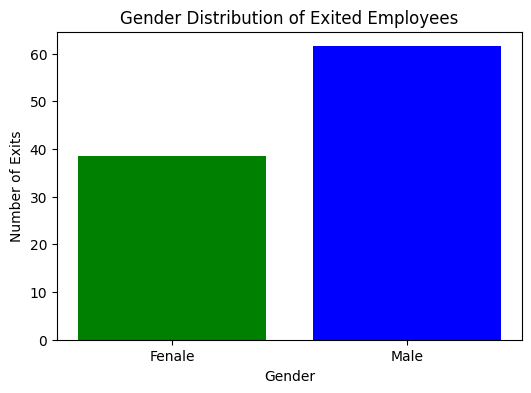

In [35]:
# Filter records where Exit = 1
exited_df = chimera_data[chimera_data['exit'] == 1]

# Count occurrences of each gender
gender_counts = exited_df['gender'].value_counts(normalize=True) * 100  # Percentage format

# Print results
print("Exit Gender Distribution:")
print(f"Male (Gender 1): {gender_counts.get(1, 0):.2f}%")
print(f"Female (Gender 0): {gender_counts.get(0, 0):.2f}%")

# Plot the results
# plt.figure(figsize=(6, 4))
# plt.bar(avg_salary.index, avg_salary.values, tick_label=["Female (0)", "Male (1)"], color=['blue', 'orange'])
# plt.xlabel("Gender")
# plt.ylabel("Average Salary")
# plt.title("Average Salary by Gender")
# plt.ylim(0, max(avg_salary.values) * 1.2)  # Adjust y-axis for better visibility

# # Display values on bars
# for i, v in enumerate(avg_salary.values):
#     plt.text(i, v + 1000, f"${v:,.2f}", ha='center', fontsize=10)

# # Show the plot
# plt.show()


# Plot the results
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, tick_label=["Male", "Fenale"], color=['blue', 'green'])
plt.xlabel("Gender")
plt.ylabel("Number of Exits")
plt.title("Gender Distribution of Exited Employees")
plt.show()

Average Salary for Gender = 0: $32.90
Average Salary for Gender = 1: $40.24


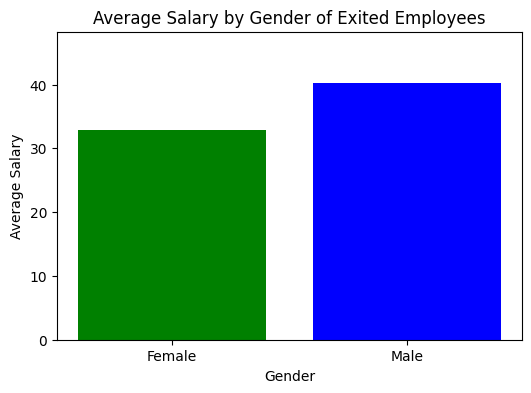

In [36]:

# Calculate average salary by gender
avg_salary = exited_df.groupby('gender')['salary'].mean()

# Print results
print(f"Average Salary for Gender = 0: ${avg_salary.get(0, 0):,.2f}")
print(f"Average Salary for Gender = 1: ${avg_salary.get(1, 0):,.2f}")

# Plot the results
plt.figure(figsize=(6, 4))
plt.bar(avg_salary.index, avg_salary.values, tick_label=["Female", "Male"], color=['green', 'blue'])
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.title("Average Salary by Gender of Exited Employees")
plt.ylim(0, max(avg_salary.values) * 1.2)  # Adjust y-axis for better visibility

# # Display values on bars
# for i, v in enumerate(avg_salary.values):
#     plt.text(i, v + 1000, f"${v:,.2f}", ha='center', fontsize=10)

plt.show()

Average Salary for Gender = 0: $33.75
Average Salary for Gender = 1: $42.08


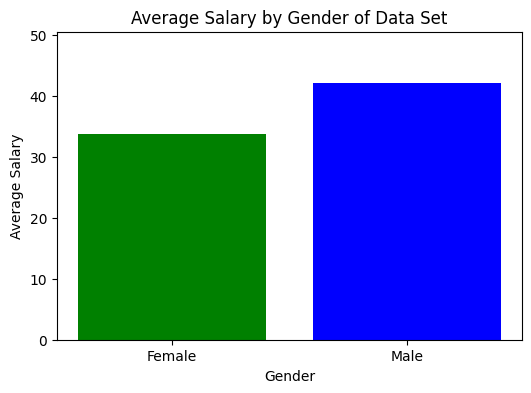

In [39]:
# Calculate average salary by gender
avg_salary = chimera_data.groupby('gender')['salary'].mean()

# Print results
print(f"Average Salary for Gender = 0: ${avg_salary.get(0, 0):,.2f}")
print(f"Average Salary for Gender = 1: ${avg_salary.get(1, 0):,.2f}")

# Plot the results
plt.figure(figsize=(6, 4))
plt.bar(avg_salary.index, avg_salary.values, tick_label=["Female", "Male"], color=['green', 'blue'])
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.title("Average Salary by Gender of Data Set")
plt.ylim(0, max(avg_salary.values) * 1.2)  # Adjust y-axis for better visibility

# # Display values on bars
# for i, v in enumerate(avg_salary.values):
#     plt.text(i, v + 1000, f"${v:,.2f}", ha='center', fontsize=10)

plt.show()

Total Count for Female (Gender = 0): 6732
Total Count for Male (Gender = 1): 11400


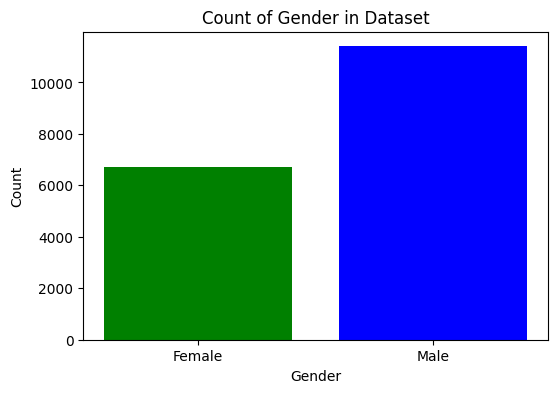

In [38]:
# Count occurrences of each gender
gender_counts = chimera_data['gender'].value_counts()

# Print results
print(f"Total Count for Female (Gender = 0): {gender_counts.get(0, 0)}")
print(f"Total Count for Male (Gender = 1): {gender_counts.get(1, 0)}")

# Plot the results
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, tick_label=["Male", "Female"], color=['blue', 'green'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of Gender in Dataset")

# # Display values on bars
# for i, v in enumerate(gender_counts.values):
#     plt.text(i, v + 2, str(v), ha='center', fontsize=10)

# Show the plot
plt.show()

In [48]:
# Filter records where rank = 5
rank_5_df = chimera_data[chimera_data['rank'] == 5]

# Count occurrences of each gender
gender_counts_rank_5 = rank_5_df['gender'].value_counts()

# Print results
print("Gender Distribution for Rank = 5:")
print(f"Male (Gender 1): {gender_counts_rank_5.get(1, 0)}")
print(f"Female (Gender 0): {gender_counts_rank_5.get(0, 0)}")

Gender Distribution for Rank = 5:
Male (Gender 1): 64
Female (Gender 0): 0


In [53]:
# Filter records where rank = 5
rank_5_df = chimera_data[chimera_data['rank'] == 1]

# Count occurrences of each gender
gender_counts_rank_5 = rank_5_df['gender'].value_counts()

# Print results
print("Gender Distribution for Rank = 4:")
print(f"Male (Gender 1): {gender_counts_rank_5.get(1, 0)}")
print(f"Female (Gender 0): {gender_counts_rank_5.get(0, 0)}")

Gender Distribution for Rank = 4:
Male (Gender 1): 4274
Female (Gender 0): 5668


In [22]:
# Data Cleaning: Removing duplicates and checking for missing values
chimera_data = chimera_data.drop_duplicates()
chimera_data = chimera_data.dropna()


In [23]:
# # Dropping the 'half_day_leaves' column
# chimera_data = chimera_data.drop(columns=["half_day_leaves"], errors='ignore')
# chimera_data = chimera_data.drop(columns=["rank"], errors='ignore')
# chimera_data = chimera_data.drop(columns=["admin"], errors='ignore')


In [24]:
# Define features and target variable
X = chimera_data.drop(columns=["gender"])  # Features
y = chimera_data["gender"]  # Target variable


In [25]:
# Standardizing numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Addressing class imbalance using SMOTE
rstate=42
smote = SMOTE(random_state=rstate)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [27]:
# Apply Lasso Regression to remove unnecessary features
lasso = LassoCV(cv=5, random_state=rstate)
lasso.fit(X_resampled, y_resampled)
selected_features = np.where(lasso.coef_ != 0)[0]  # Indices of selected features
X_selected = X.iloc[:, selected_features]  # Select only relevant features

In [28]:
# Splitting dataset into training and testing sets
tsize=0.2 # because this is a small data set we need 90% for training - leaving only 10% for testing

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=tsize, random_state=rstate, stratify=y)

In [29]:
# Training a Ridge Classifier
ridge_model = RidgeClassifier(alpha=1.0, class_weight='balanced')
ridge_model.fit(X_train, y_train)

RidgeClassifier(class_weight='balanced')

In [30]:
# Training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=rstate, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Training a Logistic Regression model
lr_model = LogisticRegression(random_state=rstate, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Training a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=rstate)
gb_model.fit(X_train, y_train)

# Training a Support Vector Machine model
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=rstate)
svm_model.fit(X_train, y_train)

# Training a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Training an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train)/sum(y_train), random_state=rstate)
xgb_model.fit(X_train, y_train)


c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:51:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Ridge Classifier Performance:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75      1347
           1       0.90      0.73      0.81      2280

    accuracy                           0.78      3627
   macro avg       0.78      0.80      0.78      3627
weighted avg       0.81      0.78      0.79      3627



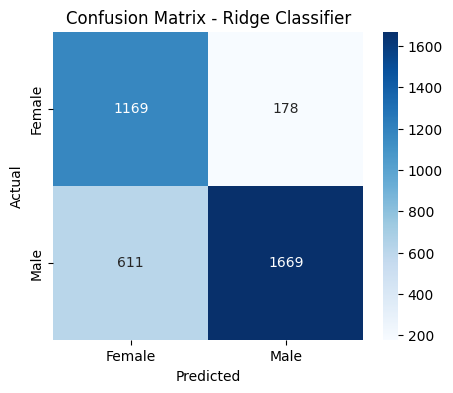

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73      1347
           1       0.83      0.86      0.84      2280

    accuracy                           0.80      3627
   macro avg       0.79      0.78      0.79      3627
weighted avg       0.80      0.80      0.80      3627



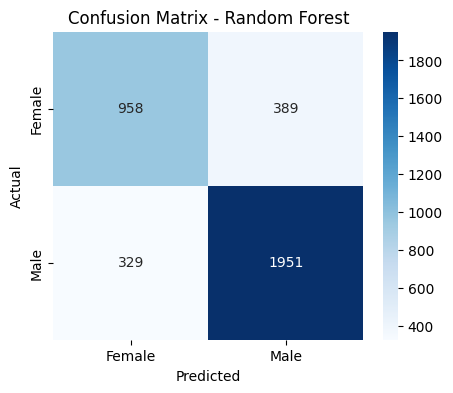

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76      1347
           1       0.88      0.79      0.83      2280

    accuracy                           0.80      3627
   macro avg       0.79      0.81      0.79      3627
weighted avg       0.81      0.80      0.80      3627



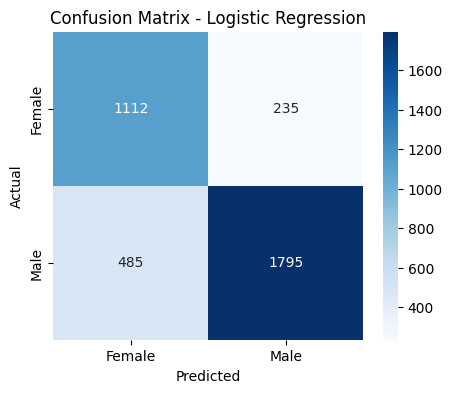

Gradient Boosting Performance:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74      1347
           1       0.84      0.86      0.85      2280

    accuracy                           0.81      3627
   macro avg       0.80      0.79      0.80      3627
weighted avg       0.81      0.81      0.81      3627



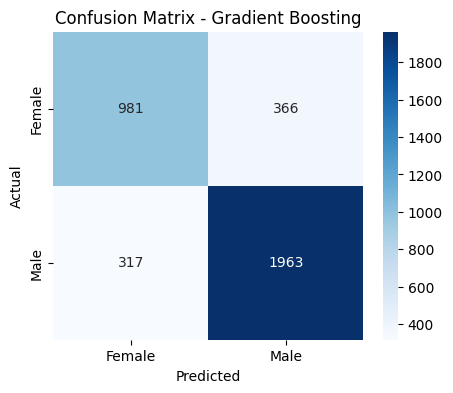

Support Vector Machine Performance:
               precision    recall  f1-score   support

           0       0.69      0.84      0.75      1347
           1       0.89      0.77      0.83      2280

    accuracy                           0.80      3627
   macro avg       0.79      0.81      0.79      3627
weighted avg       0.81      0.80      0.80      3627



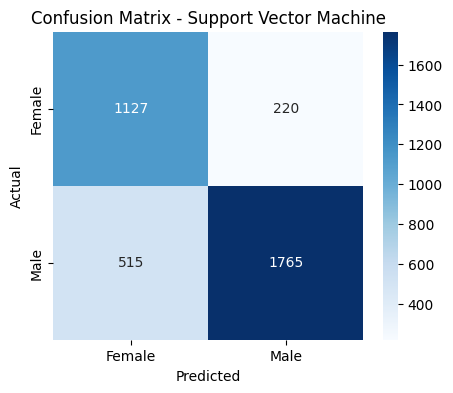

K-Nearest Neighbors Performance:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      1347
           1       0.82      0.84      0.83      2280

    accuracy                           0.79      3627
   macro avg       0.77      0.77      0.77      3627
weighted avg       0.79      0.79      0.79      3627



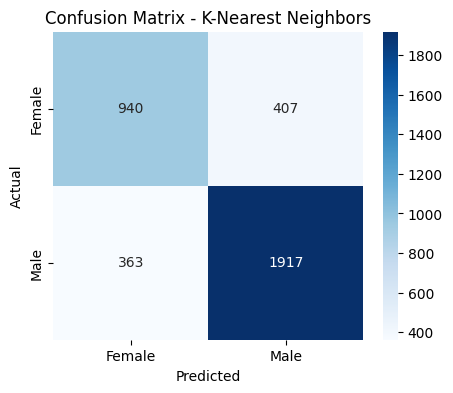

XGBoost Performance:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70      1347
           1       0.80      0.89      0.85      2280

    accuracy                           0.80      3627
   macro avg       0.79      0.76      0.77      3627
weighted avg       0.79      0.80      0.79      3627



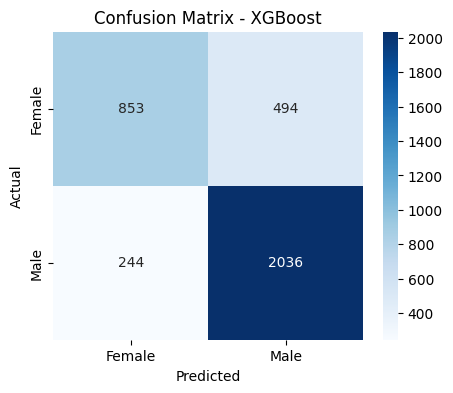

In [33]:
# Making predictions
models = {
    "Ridge Classifier": ridge_model,
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Support Vector Machine": svm_model,
    "K-Nearest Neighbors": knn_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [40]:
# Extracting feature importance for tree-based models
feature_importances_rf = rf_model.feature_importances_
feature_importances_gb = gb_model.feature_importances_
feature_importances_xgb = xgb_model.feature_importances_
selected_feature_names = X.columns[selected_features]

importance_df_rf = pd.DataFrame({"Feature": selected_feature_names, "Importance": feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by="Importance", ascending=False)

importance_df_gb = pd.DataFrame({"Feature": selected_feature_names, "Importance": feature_importances_gb})
importance_df_gb = importance_df_gb.sort_values(by="Importance", ascending=False)

importance_df_xgb = pd.DataFrame({"Feature": selected_feature_names, "Importance": feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by="Importance", ascending=False)

# Display feature importance
print("Random Forest Feature Importance:")
print(importance_df_rf)
print("Gradient Boosting Feature Importance:")
print(importance_df_gb)
print("XGBoost Feature Importance:")
print(importance_df_xgb)

Random Forest Feature Importance:
                  Feature  Importance
16                 salary    0.307578
21           variable_pay    0.086835
11        kpi_performance    0.070980
2             boss_survey    0.065696
10       job_satisfaction    0.061877
14                   rank    0.054054
1                     age    0.046130
17           subordinates    0.042954
0           admin_support    0.042124
18              team_size    0.032712
8         half_day_leaves    0.025784
4               city_size    0.023994
3             boss_tenure    0.017503
22  years_since_promotion    0.017477
19                 tenure    0.016982
20               training    0.013737
7               education    0.012840
5                clock_in    0.012022
12                  local    0.010122
15                 remote    0.009027
13              part_time    0.008501
6                    core    0.008196
9          high_potential    0.006591
23                   exit    0.006284
Gradient Boostin

C:\Users\Paul\AppData\Local\Temp\ipykernel_28432\4213005062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df_rf["Importance"], y=importance_df_rf["Feature"], palette="viridis")


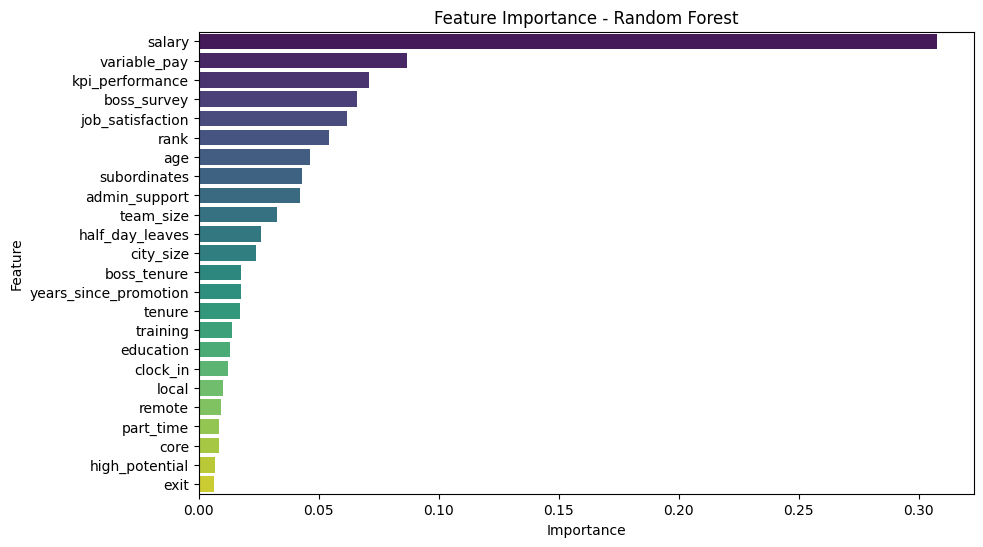

In [44]:
# Plotting Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df_rf["Importance"], y=importance_df_rf["Feature"], palette="viridis")
plt.title(f"Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_28432\2058420971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df_gb["Importance"], y=importance_df_gb["Feature"], palette="viridis")


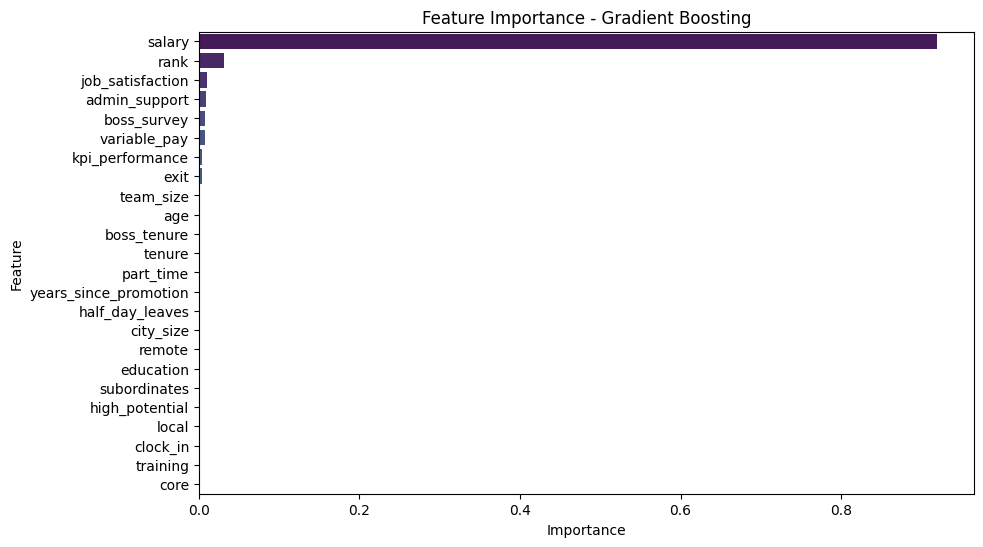

In [45]:
# Plotting Gradient Boosting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df_gb["Importance"], y=importance_df_gb["Feature"], palette="viridis")
plt.title(f"Feature Importance - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_28432\3293069798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df_xgb["Importance"], y=importance_df_xgb["Feature"], palette="viridis")


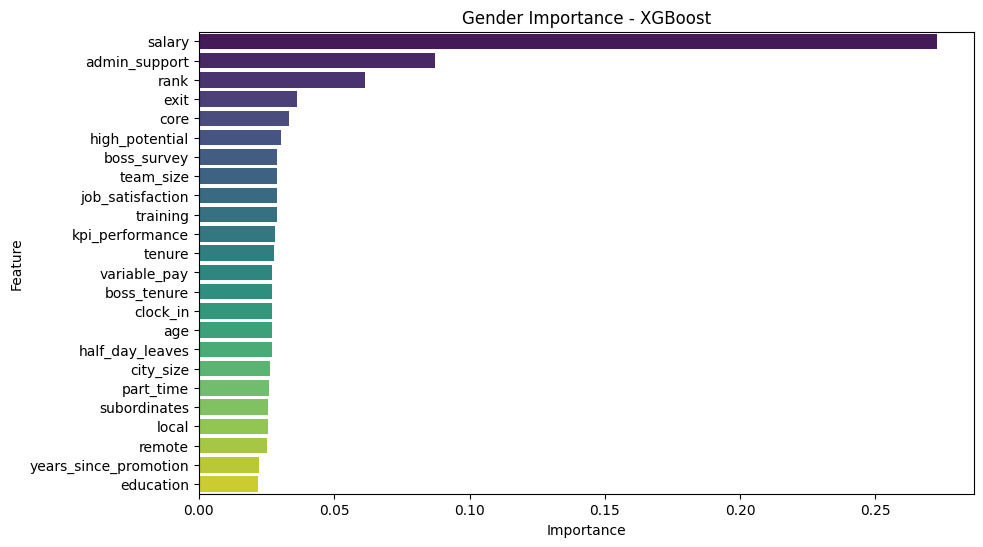

In [47]:
# Plotting XGBoost feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df_xgb["Importance"], y=importance_df_xgb["Feature"], palette="viridis")
plt.title(f"Gender Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [41]:
# Feature Importance Visualization (For Tree-Based Models)
def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feature_names = chimera_data.drop(columns=["gender"]).columns

        #  # Check if lengths match
        # if len(feature_names) != len(importance):
        #     raise ValueError("Length of feature_names and importance do not match")
        
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
        plt.title(f"Feature Importance - {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.show()

for name, model in models.items():
    plot_feature_importance(model, name)


ValueError: All arrays must be of the same length